In [593]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from functools import reduce
from sklearn.cluster import KMeans
from matplotlib.ticker import MultipleLocator

# Score change visualizations #

## Illinois ##

## Arkansas ##

In [648]:
state = "AR"
test_type_dict = {'AR':'ACT', 'MA': 'SAT'}

df_merged = load_and_merge_data(state)


C:\Users\mauro\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\mauro\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\mauro\AppData\Local\Temp\ipykernel_29240\909605938.py:50: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




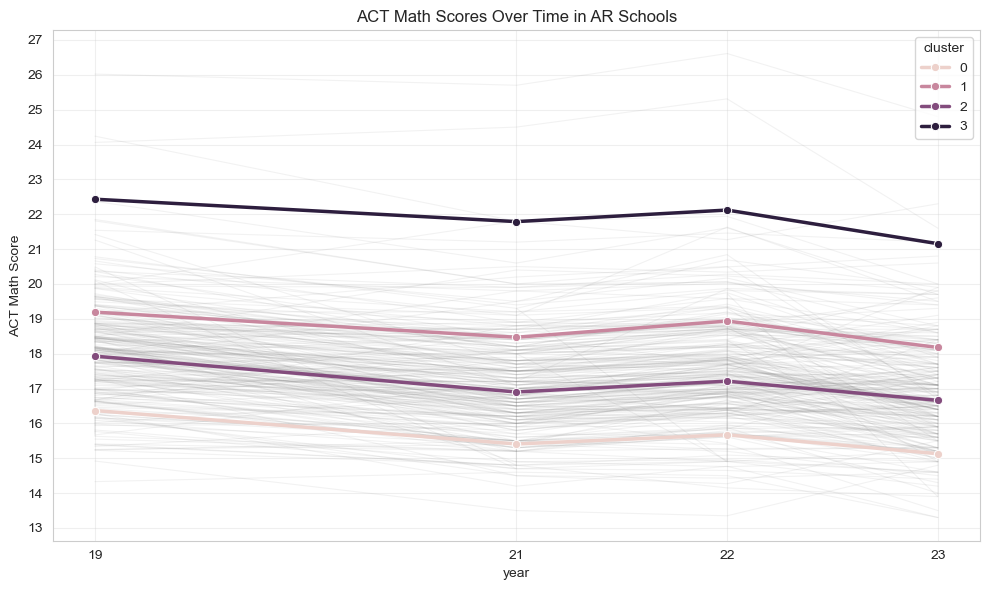

In [649]:
spaghetti_cluster(state, df_merged)

C:\Users\mauro\AppData\Local\Temp\ipykernel_29240\3467617724.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\mauro\AppData\Local\Temp\ipykernel_29240\3467617724.py:13: UserWarning:



The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).




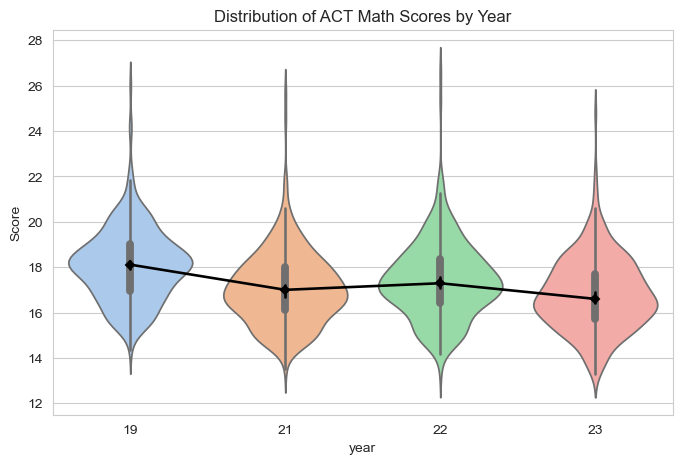

In [650]:
violin_plots(state, df_merged)

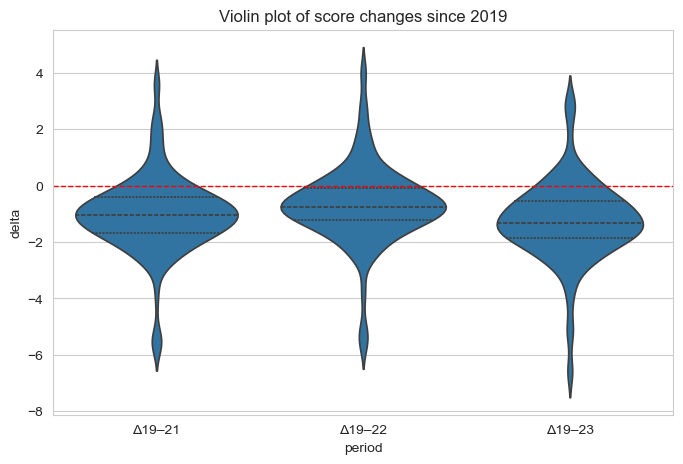

In [651]:
violin_plots_changes(state, df_merged)

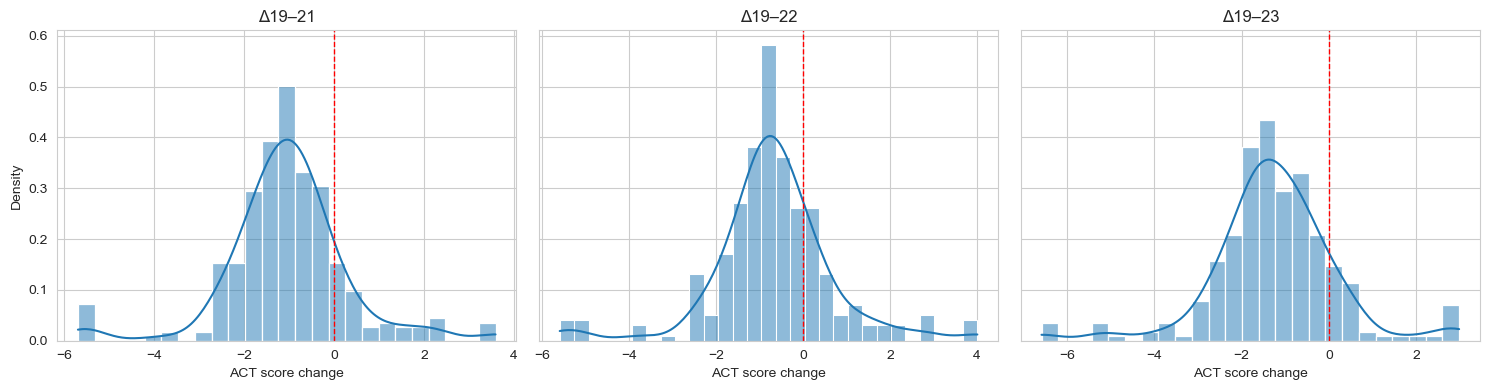

In [652]:
histogram(state, df_merged)

### old plot code (remove) ###

In [289]:
state = "AR"
test_type_dict = {'AR':'ACT', 'MA': 'SAT'}

dfs = []

for i in range(19,24):
    if i == 20 and (state == 'IL' or state == 'AR'):
        continue
    s_year = str(i)
    pre = r"C:\Users\mauro\OneDrive\Desktop\MATH\Spring_2025\Erdos\project\project_files\data" 
    state_year = state + s_year

    filename = state_year + "_cleaned_ed_school_demographics.csv"

    filepath = os.path.join(pre, state_year, filename)
    
    df = pd.read_csv(filepath)
    dfs.append(df)
    print("added", s_year)

added 19
added 21
added 22
added 23


In [301]:
dfs[0].columns

Index(['school_name', 'Grade', 'District Name',
       ' Average % ACT Composite Score ',
       'perc_test_taking_grades_9_12_students', 'number_of_students',
       'perc_frl', 'perc_white', 'perc_hispanic', 'perc_african_american',
       'perc_other_race', 'perc_minority', 'Region',
       ' Number of Students in Grades 9-12 ',
       ' % Students in grade 9-12 that took the ACT2', 'ACT_reading',
       'ACT_english', 'ACT_math', 'ACT_science', 'Average ACT Composite Score',
       'number_AP_exam_taking_students', 'number_AP_exams_taken',
       '% of Exams that scored 3 or Above', 'is_open_enrollment_charter',
       'School LEA', 'DLEA', 'year'],
      dtype='object')

In [291]:
[len(df) for df in dfs]

[295, 276, 301, 286]

In [292]:
df_all_years.head(1)

,school_name,ACT_math_19
0,Academic Center For Excellence,17.25


In [293]:
from functools import reduce
renamed_dfs = []

for df in dfs:
    yr = df['year'].iloc[0]
    yr = str(int(yr))[2:]
    renamed = df.drop('year', axis=1) \
                .rename(columns={'ACT_math': f'ACT_math_{yr}'})
    renamed = renamed[['school_name', f'ACT_math_{yr}']]
    renamed['school_name'] = renamed['school_name'].str.lower()
    renamed_dfs.append(renamed)

merged = reduce(
    lambda L, R: pd.merge(L, R, on='school_name', how='outer'),
    renamed_dfs
)




In [294]:
merged.head(1)

,school_name,ACT_math_19,ACT_math_21,ACT_math_22,ACT_math_23
0,academic center for excellence,17.25,16.7,17.18,15.9


In [295]:
merged_cleaned = merged.dropna()

merged_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, 0 to 394
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school_name  301 non-null    object 
 1   ACT_math_19  301 non-null    float64
 2   ACT_math_21  301 non-null    float64
 3   ACT_math_22  301 non-null    float64
 4   ACT_math_23  301 non-null    float64
dtypes: float64(4), object(1)
memory usage: 14.1+ KB


In [300]:
df_19 = dfs[0]
df_19['school_name'] = df_19['school_name'].str.lower()

df = pd.merge(df_19, merged_cleaned, on = 'school_name', how = 'inner')
df.to_csv(r'C:\Users\mauro\OneDrive\Desktop\MATH\Spring_2025\Erdos\project\project_files\data\AR_comparison\AR_comparison.csv', index = False)

In [298]:
df.head(1)

,school_name,Grade,District Name,Average % ACT Composite Score,perc_test_taking_grades_9_12_students,number_of_students,perc_frl,perc_white,perc_hispanic,perc_african_american,...,number_AP_exams_taken,% of Exams that scored 3 or Above,is_open_enrollment_charter,School LEA,DLEA,year,ACT_math_19,ACT_math_21,ACT_math_22,ACT_math_23
0,academic center for excellence,5-12,Cabot School District,17.63,54.0,292.0,47.0,88.0,4.0,3.0,...,N<10,RV,0,4304703,4304000,2019.0,17.25,16.7,17.18,15.9


In [260]:
len(merged_cleaned)

301

In [382]:
# suppose df has columns ['school_name','ACT_math_19','ACT_math_21','ACT_math_22','ACT_math_23']
df_long = merged_cleaned.melt(
    id_vars='school_name',
    value_vars=['ACT_math_19','ACT_math_21','ACT_math_22','ACT_math_23'],
    var_name='year',
    value_name='act_math_score'
)

# clean up the year column
df_long['year'] = df_long['year'].str.replace('ACT_math_','').astype(int)



In [263]:
df_long.head(1)

,school_name,year,act_math_score
0,academic center for excellence,19,17.25


In [647]:


plt.figure(figsize=(10,6))
sns.lineplot(
    data=df_long,
    x='year',
    y='act_math_score',
    units='school_name',        # draw a line per school
    estimator=None,             # don’t aggregate
    alpha=0.1,                  # very faint lines
    lw=0.8,
)
plt.title("ACT‑Math Scores Over Time (300 schools)")
plt.ylabel("ACT Math Score")
plt.xticks([19,21,22,23])
plt.show()


ValueError: Could not interpret value `act_math_score` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [645]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.violinplot(
    data=df_long,
    x='year',
    y='act_math_score',
    palette='pastel'
)
sns.pointplot(
    data=df_long,
    x='year',
    y='act_math_score',
    estimator='median',
    color='k',
    markers='D',
    scale=0.7
)
plt.title("Distribution of ACT math scores by year")
plt.ylabel("Score")
plt.show()


ValueError: Could not interpret value `act_math_score` for `y`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

C:\Users\mauro\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\mauro\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\mauro\AppData\Local\Temp\ipykernel_29240\1070847642.py:32: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\mauro\anaconda3\envs\erdos_spring_2025\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.



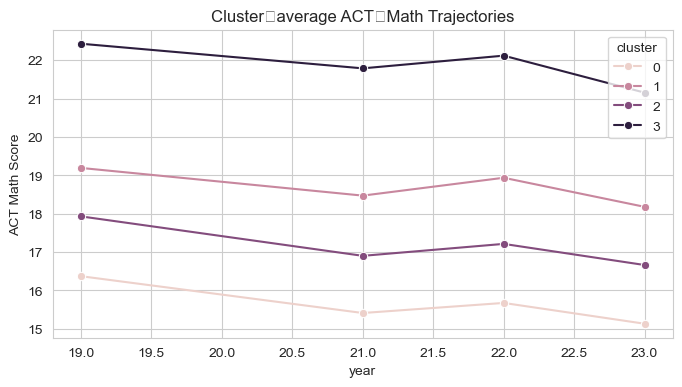

In [277]:
# 1. Pivot so each school is one row, each year one column
pivot = df_long.pivot_table(
    index='school_name',
    columns='year',
    values='act_math_score',
    aggfunc='mean'    # combine duplicates if any
).dropna()

# 2. Cluster
kmeans = KMeans(n_clusters=4, random_state=0).fit(pivot)
pivot['cluster'] = kmeans.labels_

# 3. Melt *with* the cluster column intact
years = [col for col in pivot.columns if col != 'cluster']  # e.g. [19,21,22,23]
cluster_long = (
    pivot
    .reset_index()
    .melt(
        id_vars=['school_name','cluster'],
        value_vars=years,
        var_name='year',
        value_name='score'
    )
)

# 4. Plot the mean trajectory per cluster
plt.figure(figsize=(8,4))
sns.lineplot(
    data=cluster_long,
    x='year',
    y='score',
    hue='cluster',
    estimator='mean',
    ci=None,
    marker='o'
)
plt.title("Cluster‑average ACT‑Math Trajectories")
plt.ylabel("ACT Math Score")
plt.show()


In [385]:
merged_cleaned.head(1)

,school_name,ACT_math_19,ACT_math_21,ACT_math_22,ACT_math_23
0,academic center for excellence,17.25,16.7,17.18,15.9


In [386]:
inc = merged_cleaned.copy()

inc['Δ19–21'] = inc['ACT_math_21'] - inc['ACT_math_19']
inc['Δ19–22'] = inc['ACT_math_22'] - inc['ACT_math_19']
inc['Δ19–23'] = inc['ACT_math_23'] - inc['ACT_math_19']

inc = inc[['Δ19–21', 'Δ19–22', 'Δ19–23']]

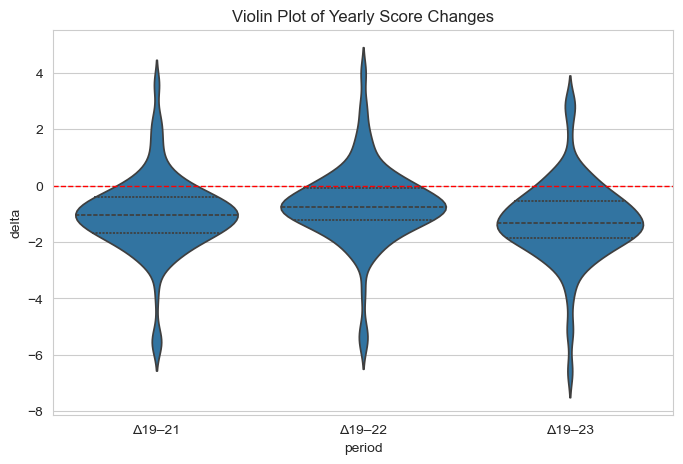

In [387]:
inc = merged_cleaned.copy()

inc['Δ19–21'] = inc['ACT_math_21'] - inc['ACT_math_19']
inc['Δ19–22'] = inc['ACT_math_22'] - inc['ACT_math_19']
inc['Δ19–23'] = inc['ACT_math_23'] - inc['ACT_math_19']

inc = inc[['Δ19–21', 'Δ19–22', 'Δ19–23']]
# Suppose `inc` is your DataFrame of shape (300×3) with columns ['Δ19–21','Δ21–22','Δ22–23']
inc_long = (
    inc
    .reset_index(drop=True)
    .melt(
        var_name='period',
        value_name='delta'
    )
)

plt.figure(figsize=(8,5))
sns.violinplot(data=inc_long, x='period', y='delta', inner='quartile')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title("Violin Plot of Yearly Score Changes")
plt.show()



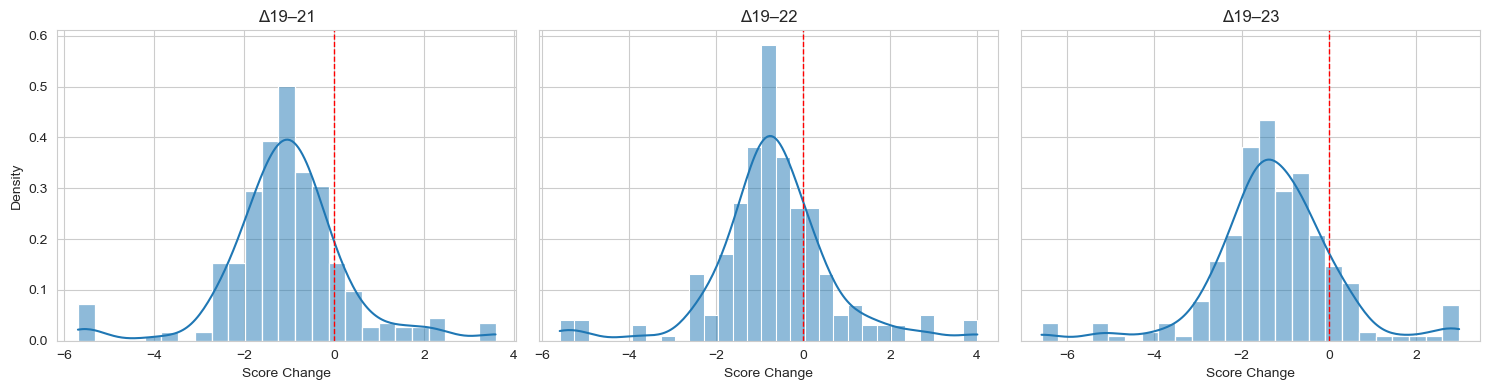

In [388]:
fig, axes = plt.subplots(1, len(inc_long['period'].unique()), figsize=(15, 4), sharey=True)

for ax, period in zip(axes, inc_long['period'].unique()):
    sub = inc_long[inc_long['period'] == period]
    sns.histplot(sub['delta'], kde=True, stat='density', ax=ax)
    ax.axvline(0, color='red', linestyle='--', linewidth=1)
    ax.set_title(period)
    ax.set_xlabel('Score Change')
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()



In [389]:
inc_long

,period,delta
0,Δ19–21,-0.55
1,Δ19–21,-2.39
2,Δ19–21,-0.76
3,Δ19–21,-0.96
4,Δ19–21,1.41
...,...,...
898,Δ19–23,-2.15
899,Δ19–23,-2.09
900,Δ19–23,-1.97
901,Δ19–23,-1.39


## Massachusetts ##

TODO: 
- fix y axis for spaghetti plot
- add 2020 plot for violin plots changes
- add 2020 data to spaghetti plot

In [664]:
state = "MA"
test_type_dict = {'AR':'ACT', 'MA': 'SAT'}

df_merged = load_and_merge_data(state)


C:\Users\mauro\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\mauro\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\mauro\AppData\Local\Temp\ipykernel_29240\535715160.py:41: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




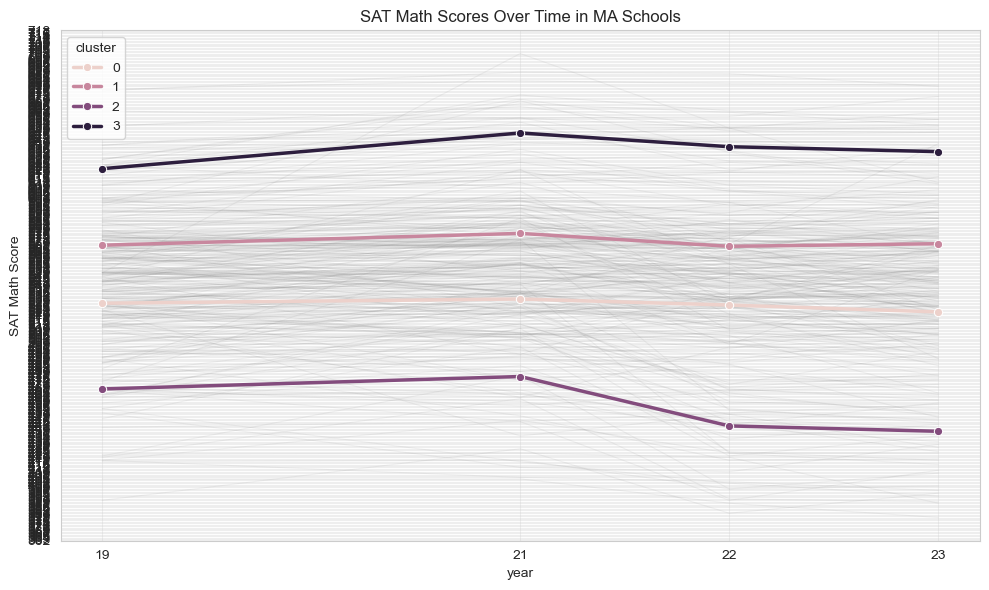

In [665]:
spaghetti_cluster(state, df_merged)

C:\Users\mauro\AppData\Local\Temp\ipykernel_29240\3467617724.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\mauro\AppData\Local\Temp\ipykernel_29240\3467617724.py:13: UserWarning:



The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).




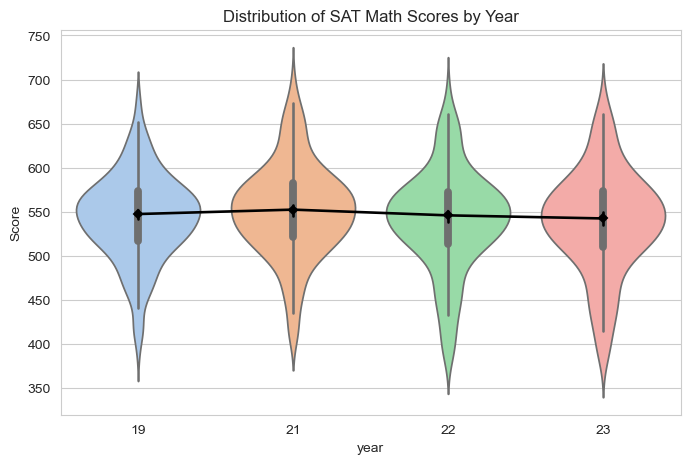

In [666]:
violin_plots(state, df_merged)

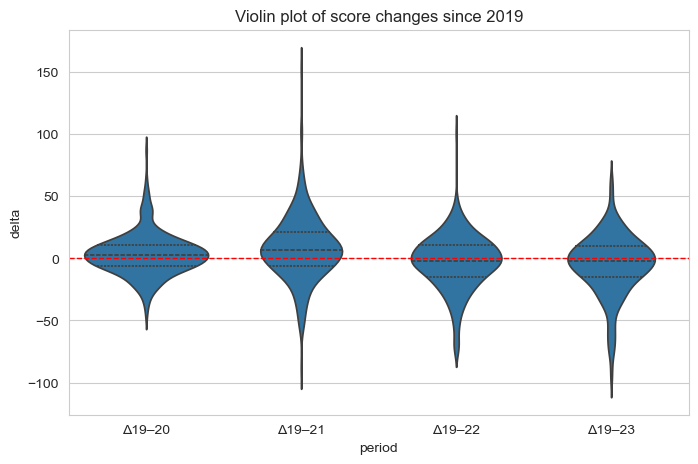

In [667]:
violin_plots_changes(state, df_merged)

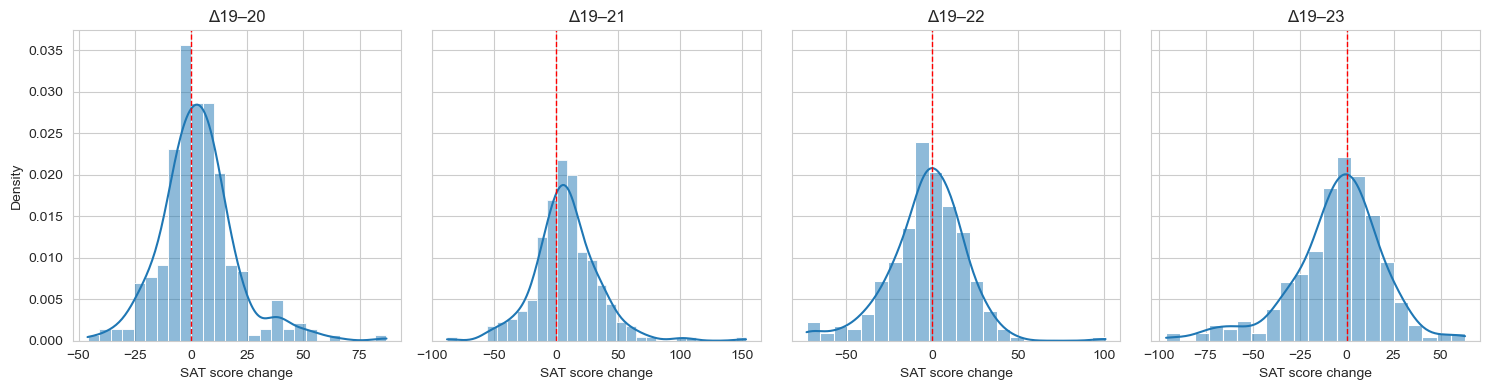

In [668]:
histogram(state, df_merged)

# Functions #

## Data loading and transformation functions ##

In [614]:
def load_data(state):
    test_type_dict = {'AR':'ACT', 'MA': 'SAT', 'IL':'SAT'}

    dfs = []

    for i in range(19,24):
        if i == 20 and state == 'AR':
            continue
        s_year = str(i)
        pre = r"C:\Users\mauro\OneDrive\Desktop\MATH\Spring_2025\Erdos\project\project_files\data" 
        state_year = state + s_year
    
        filename = state_year + "_cleaned_ed_school_demographics.csv"
    
        filepath = os.path.join(pre, state_year, filename)
        
        df = pd.read_csv(filepath)
        dfs.append(df)
    return dfs

In [632]:
df = load_and_merge_data('MA')

In [658]:
def load_and_merge_data(state):
    dfs = load_data(state)
    
    test_type_dict = {'AR':'ACT', 'MA': 'SAT', 'IL':'SAT'}
    test_type = test_type_dict[state]
    
    renamed_dfs = []
    for df in dfs:
        yr = df['year'].iloc[0]
        yr = str(int(yr))[2:]
        renamed = df.drop('year', axis=1) \
                    .rename(columns={test_type + '_math': test_type + f'_math_{yr}'})
        renamed = renamed[['school_name', test_type + f'_math_{yr}']]
        renamed['school_name'] = renamed['school_name'].str.lower()
        renamed_dfs.append(renamed)
    
    merged = reduce(lambda L, R: pd.merge(L, R, on='school_name', how='outer'), renamed_dfs)
    merged = merged.dropna()
    return merged


    

In [659]:
def create_df_long(state, df_merged):
    test_type_dict = {'AR':'ACT', 'MA': 'SAT', 'IL': 'SAT'}
    test_type = test_type_dict[state]
    # suppose df has columns ['school_name','ACT_math_19','ACT_math_21','ACT_math_22','ACT_math_23']
    df_long = df_merged.melt(
        id_vars='school_name',
        value_vars=[test_type + '_math_19', test_type + '_math_21',test_type + '_math_22',test_type + '_math_23'],
        var_name='year',
        value_name= test_type + '_math_score'
    )
    
    # clean up the year column
    df_long['year'] = df_long['year'].str.replace(test_type + '_math_','').astype(int)

    return df_long


In [660]:
def create_score_changes(state, df):
    test_type_dict = {'AR': 'ACT', 'MA': 'SAT', 'IL': 'SAT'}
    test_type = test_type_dict[state]
    inc = df.copy()
    
    if state != 'AR':
        inc['Δ19–20'] = inc[test_type + '_math_20'] - inc[test_type + '_math_19']
    inc['Δ19–21'] = inc[test_type + '_math_21'] - inc[test_type + '_math_19']
    inc['Δ19–22'] = inc[test_type + '_math_22'] - inc[test_type + '_math_19']
    inc['Δ19–23'] = inc[test_type + '_math_23'] - inc[test_type + '_math_19']

    change_columns = ['Δ19–20','Δ19–21', 'Δ19–22', 'Δ19–23']
    if state == 'AR':
        change_columns.remove('Δ19–20')
    
    inc = inc[change_columns]
    return inc
    
    

## Plotting functions ##

In [661]:
def spaghetti_plot(state, df_merged):
    df_long = create_df_long(df_merged)
    test_type_dict = {'AR':'ACT', 'MA': 'SAT', 'IL': 'SAT'}
    test_type = test_type_dict[state]
        
    plt.figure(figsize=(10,6))
    sns.lineplot(
        data=df_long,
        x='year',
        y=test_type + '_math_score',
        units='school_name',        
        estimator=None,             
        alpha=0.1,                  
        lw=0.8,
    )
    plt.title(test_type + " Math Scores Over Time in " +state + ' schools')
    plt.ylabel(test_type + " Math Score")
    plt.xticks([19,21,22,23])
    plt.show()
        
    

In [560]:
def violin_plots(state, df_merged):
    df_long = create_df_long(state, df_merged)
    test_type_dict = {'AR':'ACT', 'MA': 'SAT', 'IL': 'SAT'}
    test_type = test_type_dict[state]
    
    plt.figure(figsize=(8,5))
    sns.violinplot(
        data = df_long,
        x = 'year',
        y = test_type + '_math_score',
        palette = 'pastel'
    )
    sns.pointplot(
        data = df_long,
        x = 'year',
        y = test_type + '_math_score',
        estimator = 'median',
        color = 'k',
        markers = 'D',
        scale = 0.7
    )
    plt.title("Distribution of " + test_type + " Math Scores by Year")
    plt.ylabel("Score")
    plt.show()

In [662]:
def spaghetti_cluster(state, df_merged):

    df_long = create_df_long(state, df_merged)
    
    test_type_dict = {'AR': 'ACT', 'MA': 'SAT', 'IL': 'SAT'}
    test_type = test_type_dict[state]
    score_col  = f"{test_type}_math_score"

    
    # compute the clusters first so we can plot them later
    pivot = (df_long.pivot_table(index='school_name', columns='year', values=score_col, aggfunc='mean').dropna())

    kmeans = KMeans(n_clusters=4, random_state=0).fit(pivot)
    pivot['cluster'] = kmeans.labels_

    years = [c for c in pivot.columns if c != 'cluster']
    cluster_long = (pivot.reset_index()
                          .melt(id_vars=['school_name', 'cluster'],
                                value_vars=years,
                                var_name='year',
                                value_name='score'))

    # build the plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # spaghetti lines 
    sns.lineplot(
        data=df_long,
        x='year',
        y=score_col,
        units='school_name',
        estimator=None,
        alpha=0.10,
        lw=0.8,
        color='gray',
        ax=ax,
        legend=False          
    )

    # cluster‑average trajectories 
    sns.lineplot(
        data=cluster_long,
        x='year',
        y='score',
        hue='cluster',
        estimator='mean',
        ci=None,
        marker='o',
        lw=2.5,
        ax=ax                
    )

    # cosmetic touches
    ax.set_title(f"{test_type} Math Scores Over Time in {state} Schools")
    ax.set_ylabel(f"{test_type} Math Score")
    ax.set_xticks(sorted(years))
    ax.grid(True, alpha=0.3)
    ax.yaxis.set_major_locator(MultipleLocator(1))
    plt.tight_layout()
    plt.show()


In [573]:
def violin_plots_changes(state, df_merged):
    
    df_scores = create_score_changes(state, df_merged)
    inc = df_scores
    
    inc_long = (inc.reset_index(drop=True).melt(var_name='period', value_name='delta'))
    
    plt.figure(figsize=(8,5))
    sns.violinplot(data=inc_long, x='period', y='delta', inner='quartile')
    plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
    plt.title("Violin plot of score changes since 2019")
    plt.show()


In [663]:
def histogram(state, df_merged):
    test_type_dict = {'AR': 'ACT', 'MA': 'SAT', 'IL': 'SAT'}
    test_type = test_type_dict[state]
    
    inc = create_score_changes(state, df_merged)
    
    inc_long = (
        inc
        .reset_index(drop=True)
        .melt(
            var_name='period',
            value_name='delta'
        )
    )
    fig, axes = plt.subplots(1, len(inc_long['period'].unique()), figsize=(15, 4), sharey=True)
    
    for ax, period in zip(axes, inc_long['period'].unique()):
        sub = inc_long[inc_long['period'] == period]
        sns.histplot(sub['delta'], kde=True, stat='density', ax=ax)
        ax.axvline(0, color='red', linestyle='--', linewidth=1)
        ax.set_title(period)
        ax.set_xlabel(test_type + ' score change')
        ax.set_ylabel('Density')
    
    plt.tight_layout()
    plt.show()